## Census Income Data

In [1]:
# importing libraries 
import numpy as np
import pandas as pd

# Reading data

data1 = pd.read_csv("Census Income Data Set1.csv" , na_values='?')
data2 = pd.read_csv("Census Income Data Set2.csv" , na_values='?')

In [2]:
## Checking data sample
# Take a quick look at the data structure
data1.head(5)

,PersonID,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,gender
0,P1,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male
1,P2,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,P3,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,P4,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,P5,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female


In [3]:
## Checking data sample
# Take a quick look at the data structure
data2.head(5)

,PID,capital.gain,capital.loss,hours.per.week,native.country,class
0,P1,2174,0,40,United-States,<=50K
1,P2,0,0,13,United-States,<=50K
2,P3,0,0,40,United-States,<=50K
3,P4,0,0,40,United-States,<=50K
4,P5,0,0,40,Cuba,<=50K


## 1.	Merge datasets

In [4]:
# checking shape of datasets

print(data1.shape)
print(data2.shape)

(48842, 11)
(48842, 6)


In [5]:
# merging the data frames 

final_data = pd.merge(data1, data2, left_on='PersonID',right_on='PID'  ,how='outer')

In [6]:
# checking shape of merged dataset
final_data.shape

(48842, 17)

In [7]:
## Checking merged data sample
# Take a quick look at the data structure
final_data.head(5)

,PersonID,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,gender,PID,capital.gain,capital.loss,hours.per.week,native.country,class
0,P1,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,P1,2174,0,40,United-States,<=50K
1,P2,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,P2,0,0,13,United-States,<=50K
2,P3,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,P3,0,0,40,United-States,<=50K
3,P4,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,P4,0,0,40,United-States,<=50K
4,P5,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,P5,0,0,40,Cuba,<=50K


In [8]:
# droping columns 'PersonaID' and 'PID'

final_data = final_data.drop(['PersonID','PID'], axis=1)

In [9]:
# checking the columns of dataframe after dropping 'PersonaID' and 'PID'
final_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'gender',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'class'],
      dtype='object')

## 2.	Exploratory analysis - data inspections

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(final_data)

C:\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [11]:
profile

Number of variables,15
Number of observations,48842
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,128.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [12]:
# checking basic statistics 
# To see the description of the data
# quick look at the statistical description of the dataset
final_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,48842.000000,4.883800e+04,48837.000000,48842.000000,48842.000000,48842.000000
mean,38.647680,1.896588e+05,10.078097,1079.067626,87.502314,40.422382
std,13.729568,1.056029e+05,2.571056,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376285e+05,12.000000,0.000000,0.000000,45.000000
max,156.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# checking datatypes of columns
final_data.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
gender             object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country     object
class              object
dtype: object

In [14]:
# changing the datatype of target column 'class' from object to category

final_data['class'] = final_data['class'].astype('category')

In [15]:
final_data.dtypes

age                  int64
workclass           object
fnlwgt             float64
education           object
education.num      float64
marital.status      object
occupation          object
relationship        object
race                object
gender              object
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country      object
class             category
dtype: object

## 3.	Engineer at least 1 feature

### creating a function which categories 'capital.gain' into 3 
### 1) if capitain gain == 0 then no_capital_gain
### 2) if 0 < capital.gain < 45000 then medium_capital_gain
### 3) others give high_capital_gain

In [16]:
def func(x):
    if x == 0:
        return 'NO_capital_gain'
    elif 0 < x < 45000:
        return 'Medium_capital_gain'
    return 'High_capital_gain'

final_data['Capital_gain_cat'] = final_data['capital.gain'].apply(func)

### creating a function which categories 'capital.loss' into 3 
### 1) if capitain.loss == 0 then no_capital_loss
### 2) if 0 < capital.gain < 2160 then medium_capital_loss
### 3) others give high_capital_loss

In [17]:
def func(x):
    if x == 0:
        return 'NO_capital_loss'
    elif 0 < x < 2160:
        return 'Medium_capital_loss'
    return 'High_capital_loss'

final_data['Capital_loss_cat'] = final_data['capital.loss'].apply(func)

In [18]:
final_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,class,Capital_gain_cat,Capital_loss_cat
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Medium_capital_gain,NO_capital_loss
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NO_capital_gain,NO_capital_loss
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NO_capital_gain,NO_capital_loss
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NO_capital_gain,NO_capital_loss
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NO_capital_gain,NO_capital_loss


In [19]:
# checking the counts of unique values in class column
final_data['class'].value_counts() 
# class is imbalance 

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

## 4.	Data preprocessing
### Ideally it is preferred that you do your Data Preprocessing after train-test split, especially standardization and imputation.

### Train Test Split

In [20]:
# Separating Target column with remaining columns
y = final_data['class']
X = final_data[final_data.columns.difference(['class'])]

# Splitting the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=124421)

# Storing the list of categorical columns
cat_cols = ['workclass','Capital_loss_cat','Capital_gain_cat','education','education.num','marital.status','occupation','relationship','race','gender','native.country']

# Storing the list of numeric columns 
num_cols = X_train.columns.difference(cat_cols)

In [21]:
# checking null values in train
X_train.isnull().sum()
# we have few null values in train

Capital_gain_cat    0
Capital_loss_cat    0
age                 0
capital.gain        0
capital.loss        0
education           5
education.num       5
fnlwgt              4
gender              1
hours.per.week      0
marital.status      5
native.country      0
occupation          5
race                8
relationship        5
workclass           4
dtype: int64

In [22]:
# checking null values in test
X_test.isnull().sum()
# fortunately no null values in test

Capital_gain_cat    0
Capital_loss_cat    0
age                 0
capital.gain        0
capital.loss        0
education           0
education.num       0
fnlwgt              0
gender              0
hours.per.week      0
marital.status      0
native.country      0
occupation          0
race                0
relationship        0
workclass           0
dtype: int64

## Imputation

#### The scikit-learn library provides the SimpleImputer() pre-processing class that can be used to replace missing values. 
#### It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode).

In [23]:
from sklearn.impute import SimpleImputer     ##import constructor

frequent_imputer = SimpleImputer(strategy="most_frequent")     ## create object
frequent_imputer.fit(X_train[cat_cols])                   ## learn from train data 

median_imputer = SimpleImputer(strategy="median")     ## create object
median_imputer.fit(X_train[num_cols])                   ## learn from train data 

X_train[cat_cols] = frequent_imputer.transform(X_train[cat_cols])
X_train[num_cols] = median_imputer.transform(X_train[num_cols])


X_test[cat_cols] = frequent_imputer.transform(X_test[cat_cols])
X_test[num_cols] = median_imputer.transform(X_test[num_cols])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [24]:
# after imputation there are no null values in train
X_train.isnull().sum()

Capital_gain_cat    0
Capital_loss_cat    0
age                 0
capital.gain        0
capital.loss        0
education           0
education.num       0
fnlwgt              0
gender              0
hours.per.week      0
marital.status      0
native.country      0
occupation          0
race                0
relationship        0
workclass           0
dtype: int64

In [25]:
# after imutation there are no null values in test
X_test.isnull().sum()

Capital_gain_cat    0
Capital_loss_cat    0
age                 0
capital.gain        0
capital.loss        0
education           0
education.num       0
fnlwgt              0
gender              0
hours.per.week      0
marital.status      0
native.country      0
occupation          0
race                0
relationship        0
workclass           0
dtype: int64

## Outlier
### Data points which lie outside of overall distribution of the dataset are called outliers. 
### How to identify outliers? 
### - Data points that fall outside of 1.5 times the IQR (Inter Quartile Range) above 3rd quartile and below 1st quartile. 
### - Data points that fall outside 3 standard deviations. (Here, we can use a z-score and see if that z-score falls outside of 2 standard deviations)        
### -  using scatter plots 
### -  using box plots

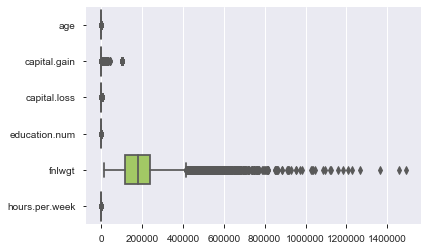

In [26]:
# checking for outliers

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(data=X_train,orient='h',palette='Set2')
plt.show()


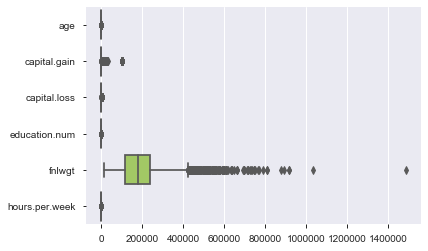

In [27]:
sns.boxplot(data=X_test,orient='h',palette='Set2')
plt.show()

In [28]:
# treating oultiers in train fnlwgt column
q1,q3 = np.percentile(X_train['fnlwgt'],[25,75])
iqr = q3-q1
Train_whisker = q3 + (1.5*iqr)
print(Train_whisker)

416367.0


In [29]:
# treating oultiers in test fnlwgt column
#q1,q3 = np.percentile(X_test['fnlwgt'],[25,75])
#iqr = q3-q1
#Test_whisker = q3 + (1.5*iqr)
#print(Test_whisker)

In [30]:
# treating outliers in 'fnlwgt' column with whisker value
X_train['fnlwgt'] = X_train['fnlwgt'].clip(upper=Train_whisker)

#X_test['fnlwgt'] = X_test['fnlwgt'].clip(upper=Test_whisker)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Dummification
### A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study.
### Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.

In [31]:
# converting categorical columns into binary by dummyfication
X_train = pd.get_dummies(X_train,columns=cat_cols)
X_test = pd.get_dummies(X_test,columns=cat_cols)

# DataFrame alignment = making sure train and test data has same set of columns
X_train, X_test = X_train.align(X_test, axis=1 , fill_value = 0)

## Standardization 
### Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed
### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
### StandardScaler results in a distribution with a standard deviation equal to 1

In [32]:
from sklearn.preprocessing import StandardScaler    ##import constructor
std_scaler = StandardScaler()   ## create object
std_scaler.fit(X_train[num_cols])                   ## learn from train data   
X_train_std = pd.DataFrame(std_scaler.transform(X_train[num_cols]))
X_test_std = pd.DataFrame(std_scaler.transform(X_test[num_cols]))

## 5.	ML modeling

### Model 1 - Decision trees with default parameters
**Notice the overfitting**

In [33]:
# importing library to apply Decision Tree algorithm (with default parameters)
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)

y_train_pred1 = dt1.predict(X_train)
y_test_pred1 = dt1.predict(X_test)

## Importing ML packages and accuracy metrics
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_train, y_train_pred1))
print(accuracy_score(y_test, y_test_pred1))

# Printing classification report of train and test
print(classification_report(y_train, y_train_pred1))
print(classification_report(y_test, y_test_pred1))

# By seeing the metrics of train and test we can say model is overfitting

0.999872034397154
0.8180980653086294
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     29696
        >50K       1.00      1.00      1.00      9377

    accuracy                           1.00     39073
   macro avg       1.00      1.00      1.00     39073
weighted avg       1.00      1.00      1.00     39073

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7459
        >50K       0.61      0.63      0.62      2310

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



### Model 2 - Logistic with original features and default parameters (lr1)

In [34]:
# importing library to apply logistic regression algorithm
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr1.fit(X_train,y_train)

y_train_pred4 = lr1.predict(X_train)
y_test_pred4 = lr1.predict(X_test)

# importing library to get classification report
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_train, y_train_pred4))
print(accuracy_score(y_test, y_test_pred4))

# Printing classification report of train and test
print(classification_report(y_train, y_train_pred4))
print(classification_report(y_test, y_test_pred4))
#class is imbalanced!

0.797276891971438
0.8013102671716654
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     29696
        >50K       0.72      0.26      0.38      9377

    accuracy                           0.80     39073
   macro avg       0.76      0.61      0.63     39073
weighted avg       0.78      0.80      0.76     39073

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7459
        >50K       0.73      0.25      0.38      2310

    accuracy                           0.80      9769
   macro avg       0.77      0.61      0.63      9769
weighted avg       0.79      0.80      0.76      9769



## 6.	Hyperparameter tuning

### Model 3 - Decision tree with max_depth=6 and balanced class weights

In [35]:
# Building 3rd model (Decision tree) with 'max_depth' parameter as '56 and 'class_weight' parameter as 'balanced'
dt2 = DecisionTreeClassifier(max_depth=6, class_weight="balanced")
dt2.fit(X_train,y_train)

y_train_pred3 = dt2.predict(X_train)
y_test_pred3 = dt2.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_train, y_train_pred3))
print(accuracy_score(y_test, y_test_pred3))

# Printing classification report of train and test
print(classification_report(y_train, y_train_pred3))
print(classification_report(y_test, y_test_pred3))

0.7278171627466536
0.7250486231958235
              precision    recall  f1-score   support

       <=50K       0.97      0.66      0.79     29696
        >50K       0.47      0.93      0.62      9377

    accuracy                           0.73     39073
   macro avg       0.72      0.80      0.70     39073
weighted avg       0.85      0.73      0.75     39073

              precision    recall  f1-score   support

       <=50K       0.96      0.67      0.79      7459
        >50K       0.46      0.91      0.61      2310

    accuracy                           0.73      9769
   macro avg       0.71      0.79      0.70      9769
weighted avg       0.84      0.73      0.75      9769



### Model 4 - Logistic Regression balanced class weights

In [36]:
# Building 4th logistic model with 'class_weight' parameter as 'balanced'
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(class_weight="balanced")
lr2.fit(X_train,y_train)

y_train_pred4 = lr2.predict(X_train)
y_test_pred4 = lr2.predict(X_test)

print(accuracy_score(y_train, y_train_pred4))
print(accuracy_score(y_test, y_test_pred4))

# Printing classification report of train and test
print(classification_report(y_train, y_train_pred4))
print(classification_report(y_test, y_test_pred4))
# By setting 'class_weight' parameter as 'balanced'
# now we are getting much better recall values

0.6502700074220049
0.6571808782884635
              precision    recall  f1-score   support

       <=50K       0.83      0.68      0.75     29696
        >50K       0.35      0.55      0.43      9377

    accuracy                           0.65     39073
   macro avg       0.59      0.61      0.59     39073
weighted avg       0.71      0.65      0.67     39073

              precision    recall  f1-score   support

       <=50K       0.83      0.69      0.75      7459
        >50K       0.35      0.55      0.43      2310

    accuracy                           0.66      9769
   macro avg       0.59      0.62      0.59      9769
weighted avg       0.72      0.66      0.68      9769

